# 4.9 Data Visualizations with Python

In [1]:
# Import Libraries

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Set Path

path = r'C:\Users\Josh Wattay\anaconda3\Instacart Basket Analysis'

In [3]:
# Import Data

ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_merge_4.8.pkl'))

## Creating Bar Charts

<Axes: xlabel='orders_day_of_week'>

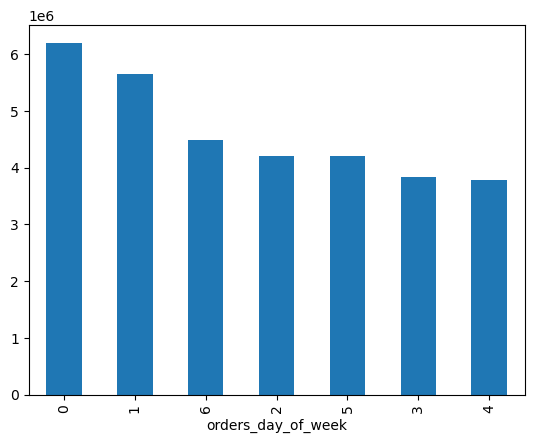

In [4]:
ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

<Axes: xlabel='orders_day_of_week'>

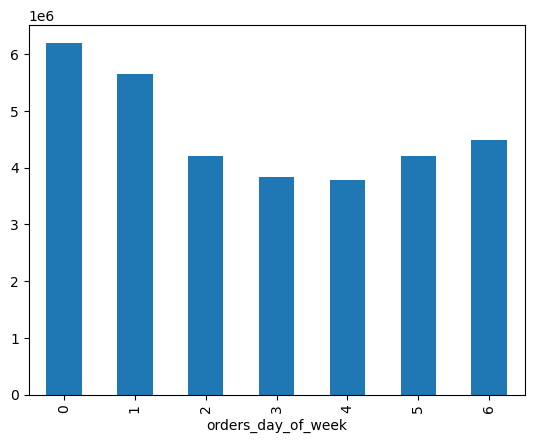

In [5]:
ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()

<Axes: xlabel='orders_day_of_week'>

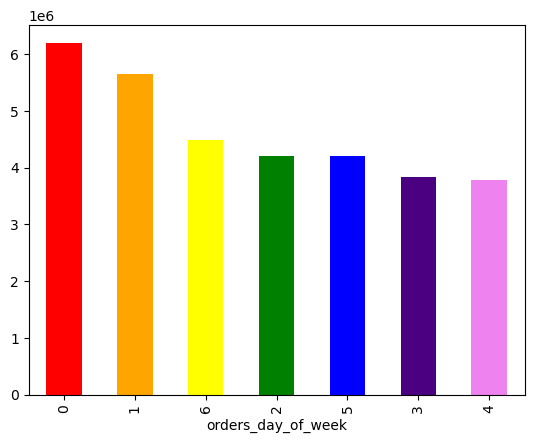

In [6]:
ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(color = ['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'violet'])

## Exporting Charts

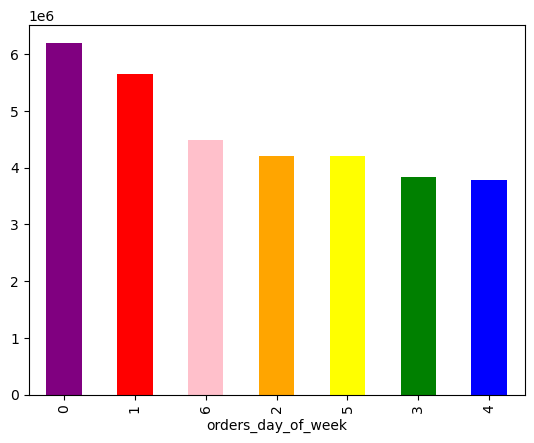

In [7]:
# Code for saving the chart into an object form

bar = ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

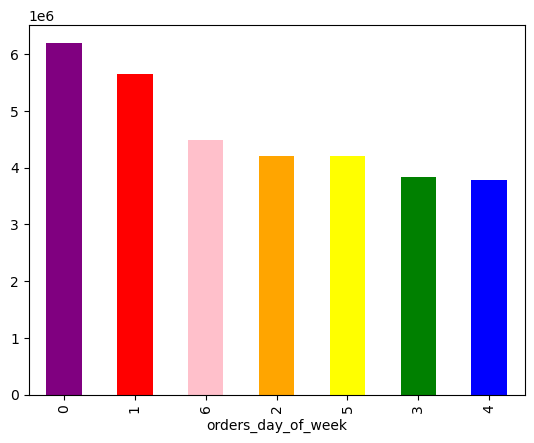

In [8]:
bar.figure

In [9]:
# Code for Exporting Bar figure to file on computer

bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

## Creating Histograms and Scatterplots

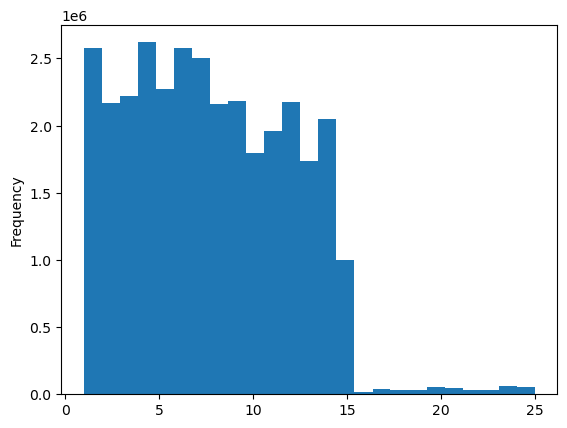

In [10]:
# Histogram of prices data

hist = ords_prods_merge['prices'].plot.hist(bins = 25)

In [11]:
ords_prods_merge['prices'].mean()

C:\Users\Josh Wattay\anaconda3\Lib\site-packages\pandas\core\nanops.py:1479: RuntimeWarning: overflow encountered in cast
  return dtype.type(n)
C:\Users\Josh Wattay\anaconda3\Lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Users\Josh Wattay\anaconda3\Lib\site-packages\pandas\core\nanops.py:731: RuntimeWarning: invalid value encountered in scalar divide
  the_mean = the_sum / count if count > 0 else np.nan


nan

In [12]:
ords_prods_merge['prices'].median()

7.4

<Axes: xlabel='prices', ylabel='prices'>

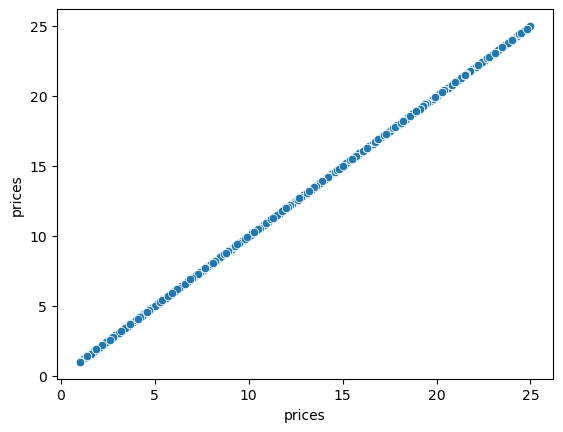

In [13]:
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

In [14]:
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

Empty DataFrame
Columns: [order_id, user_id, order_number, orders_day_of_week, orders_time_of_day, days_since_prior_order, product_id, add_to_cart_order, reordered, product_name, aisle_id, department_id, prices, _merge, price_range_loc, busiest_days, busiest_period_of_day, max_order, loyalty_flag, average_purchase_cost, spending_flag, median_days_btwn_orders, order_frequency_flag]
Index: []

[0 rows x 23 columns]

In [15]:
# Code for turning outliers into NaN or missing values

ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [16]:
ords_prods_merge['prices'].dtype

dtype('float16')

In [17]:
ords_prods_merge['prices'] = ords_prods_merge['prices'].astype(int)

In [18]:
ords_prods_merge['prices'].max()

25

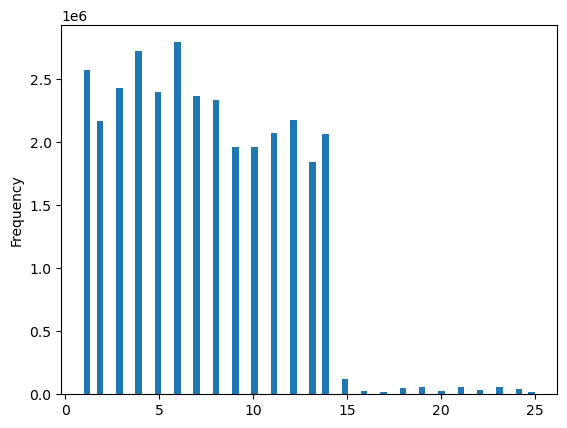

In [19]:
hist_2 = ords_prods_merge['prices'].plot.hist(bins = 70)

In [20]:
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'histo_prices.png'))

In [21]:
hist_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'histo_prices_2.png'))

## Creating Line Charts

In [22]:
# Create subset to prevent memory error

df = ords_prods_merge[:2000000]

In [23]:
df.shape

(2000000, 23)

The issue with creating a line chart from this subset or sample would not be representative of the total population of the data set, therefore we need to start sampling the data.

## Sampling Data

Need to create a randomized sampling.

In [24]:
np.random.seed(4)

In [25]:
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [26]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [27]:
# Use the dev list to split the dataframe into 2 samples

big = ords_prods_merge[dev]
small = ords_prods_merge[~dev]

In [28]:
len(ords_prods_merge)

32404859

In [29]:
len(big) + len(small)

32404859

In [30]:
df_2 = small[['orders_day_of_week','prices']]

In [31]:
df_2.head()

orders_day_of_week  prices
0                    2       9
2                    3       9
3                    4       9
6                    1       9
10                   1       9

C:\Users\Josh Wattay\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Josh Wattay\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


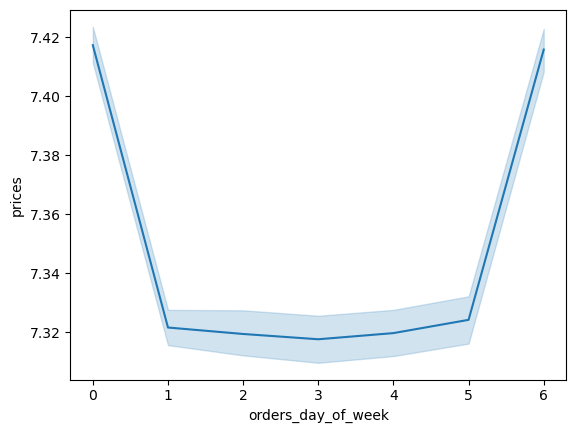

In [32]:
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

In [33]:
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_prices_day_of_week.png'))